import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn .linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
 data = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Documents\Desktop\Data\car data.csv")

In [3]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
print(data.value_counts(['Fuel_Type']))
print("\n")
print(data.Seller_Type.value_counts())
print("\n")
print(data.Transmission.value_counts())

Fuel_Type
Petrol       239
Diesel        60
CNG            2
Name: count, dtype: int64


Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [9]:
data.replace({'Fuel_Type':{'Petrol': 0, 'Diesel':1, 'CNG':2}}, inplace=True)
data.replace({'Seller_Type':{'Dealer': 0 , 'Individual':1}}, inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [11]:
#spliting data
x = data.drop(['Car_Name','Selling_Price'],axis = 1)
y = data["Selling_Price"]

In [12]:
print(x.head())

   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2014           5.59       27000          0            0             0   
1  2013           9.54       43000          1            0             0   
2  2017           9.85        6900          0            0             0   
3  2011           4.15        5200          0            0             0   
4  2014           6.87       42450          1            0             0   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  


In [13]:
print(y.head())

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.1, random_state = 2)

**Model Training** 

In [15]:
# 1. LinearRegression
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(xtrain,ytrain)

LinearRegression()

In [17]:
#prediction On Traning Data

training_data_prediction = lin_reg_model.predict(xtrain)


In [18]:
# R Squared Error
error_score = metrics.r2_score(ytrain,training_data_prediction)
print("R squared Eror :", error_score)

R squared Eror : 0.87994516604937


**Visualize the Actula price and Predicted prices**

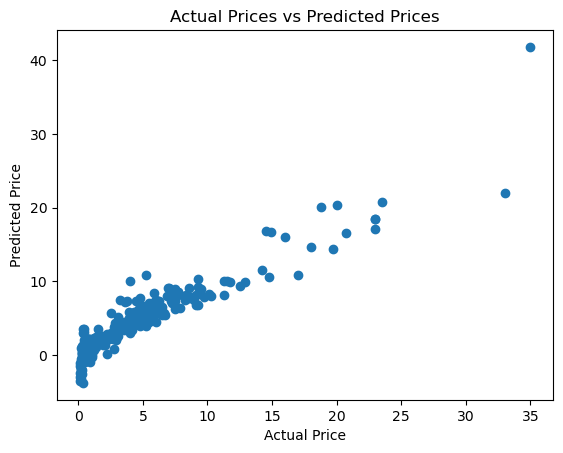

In [19]:
plt.scatter(ytrain,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [32]:
#prediction On Training Data

test_data_prediction = lin_reg_model.predict(xtest)


In [33]:
# R Squared Error
error_score = metrics.r2_score(ytest,test_data_prediction)
print("R squared Eror :", error_score)

R squared Eror : 0.8365766715025409


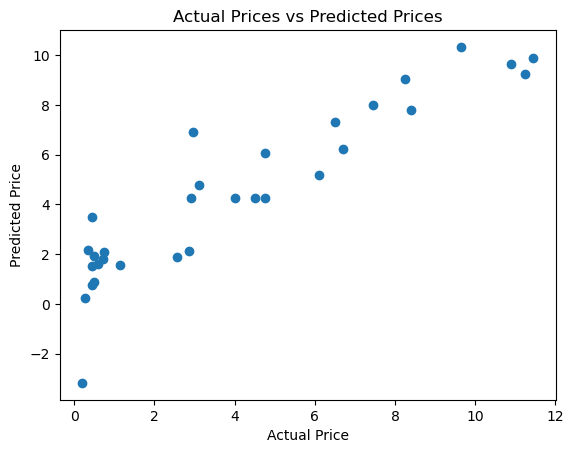

In [22]:
plt.scatter(ytest,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

***2. Lasso Regression***

In [23]:
lass_reg_model = Lasso()

In [24]:
lass_reg_model.fit(xtrain,ytrain)

Lasso()

**Model Evaluation**

In [27]:
#prediction on Training data
training_data_prediction = lass_reg_model.predict(xtrain)

In [28]:
# R square error

error_score = metrics.r2_score(ytrain,training_data_prediction)
print('R2 Score =', error_score)

R2 Score = 0.8427856123435794


***Visual of Actual Price and Predicted price***

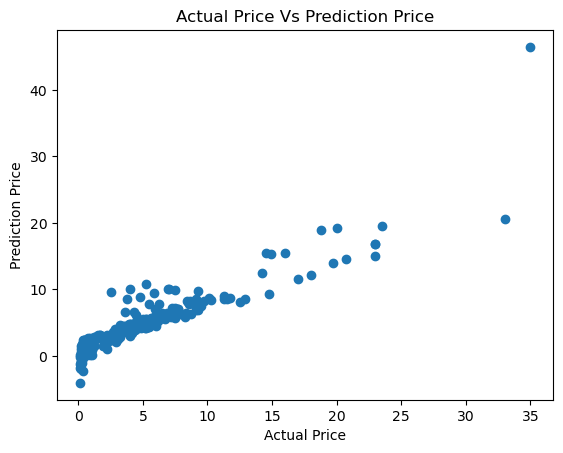

In [30]:
plt.scatter(ytrain,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.title('Actual Price Vs Prediction Price')
plt.show()

In [35]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(xtest)

In [37]:
# R squared Error
error_score = metrics.r2_score(ytest, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


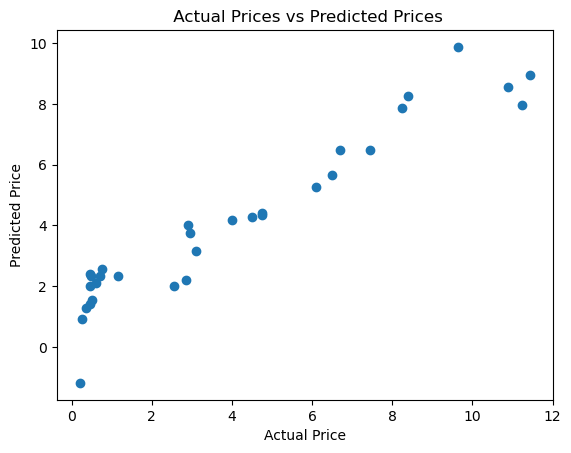

In [39]:
plt.scatter(ytest, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()